# CROSS VALIDATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR,LinearSVR

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('possum.csv')
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [3]:
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
case,104.0,52.500000,30.166206,1.0,26.750,52.50,78.250,104.0
site,104.0,3.625000,2.349086,1.0,1.000,3.00,6.000,7.0
age,102.0,3.833333,1.909244,1.0,2.250,3.00,5.000,9.0
hdlngth,104.0,92.602885,3.573349,82.5,90.675,92.80,94.725,103.1
skullw,104.0,56.883654,3.113426,50.0,54.975,56.35,58.100,68.6
totlngth,104.0,87.088462,4.310549,75.0,84.000,88.00,90.000,96.5
taill,104.0,37.009615,1.959518,32.0,35.875,37.00,38.000,43.0
footlgth,103.0,68.459223,4.395306,60.3,64.600,68.00,72.500,77.9
earconch,104.0,48.130769,4.109380,40.3,44.800,46.80,52.000,56.2
eye,104.0,15.046154,1.050374,12.8,14.400,14.90,15.725,17.8


In [7]:
df.isnull().mean()*100

case        0.000000
site        0.000000
Pop         0.000000
sex         0.000000
age         1.923077
hdlngth     0.000000
skullw      0.000000
totlngth    0.000000
taill       0.000000
footlgth    0.961538
earconch    0.000000
eye         0.000000
chest       0.000000
belly       0.000000
dtype: float64

#### Filling null values using mean

In [8]:
df.age.fillna(df.age.mean(),inplace= True)
df.footlgth.fillna( df.footlgth.mean(),inplace= True)

In [9]:
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

#### Univariate analysis

Histograms

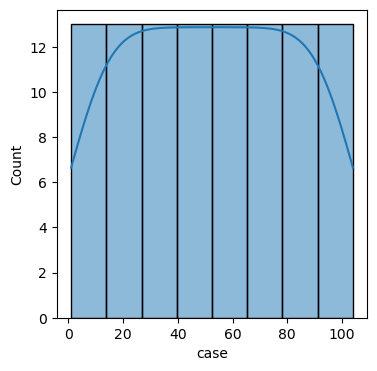

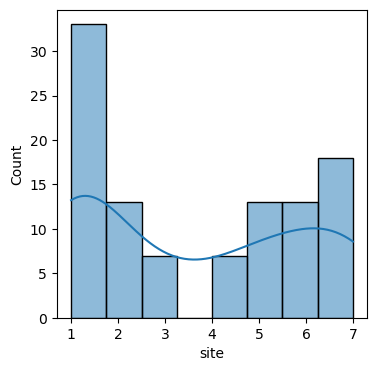

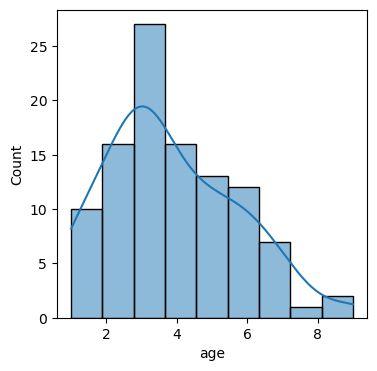

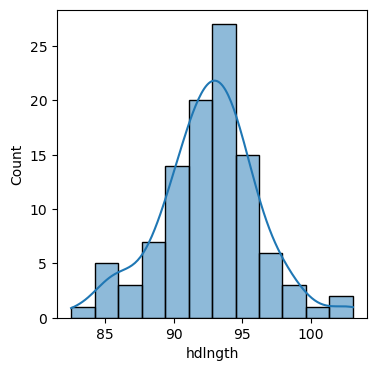

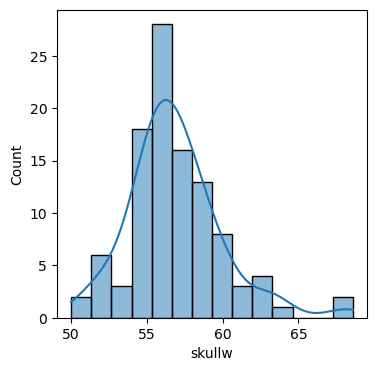

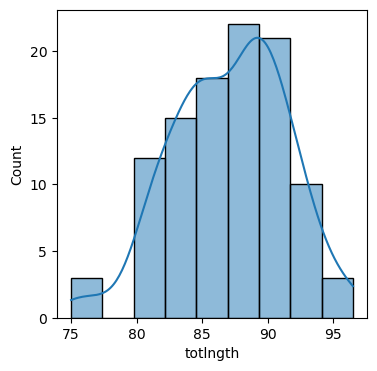

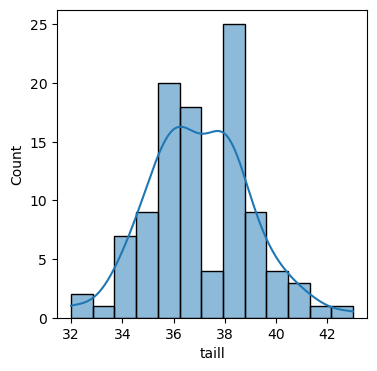

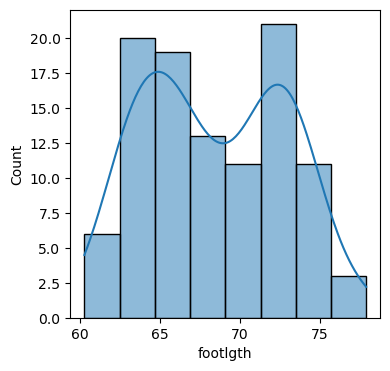

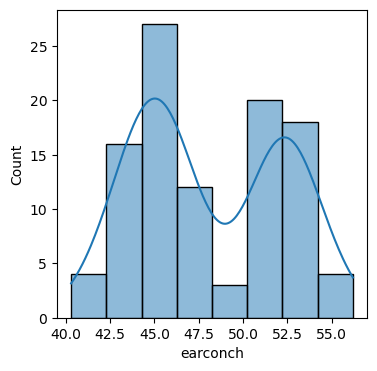

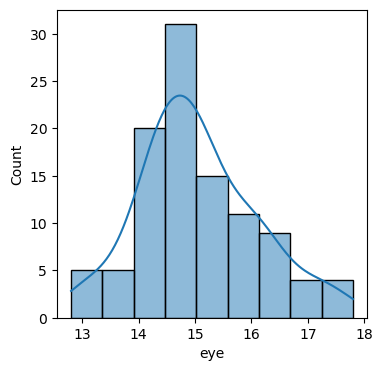

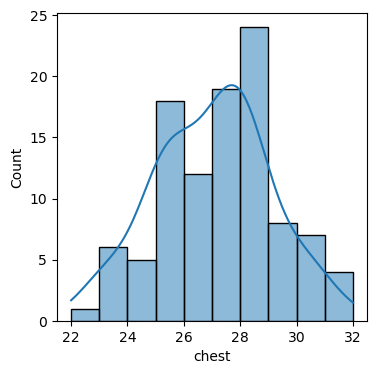

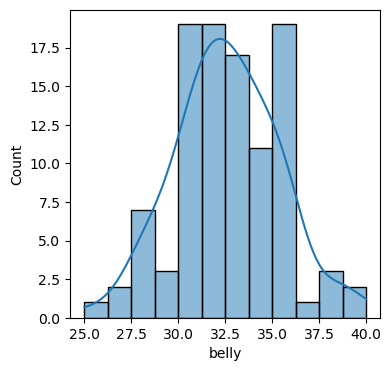

In [10]:
for i in df.columns:
    if df[i].dtypes != 'object':
        plt.figure( figsize=(4,4))
        sns.histplot( data= df, x = df[i] , kde =True)
        plt.show()
    

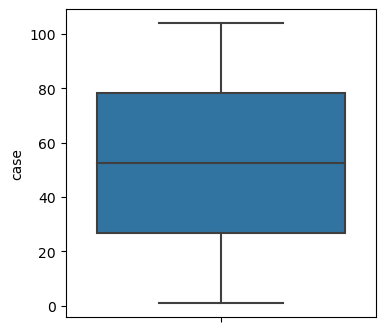

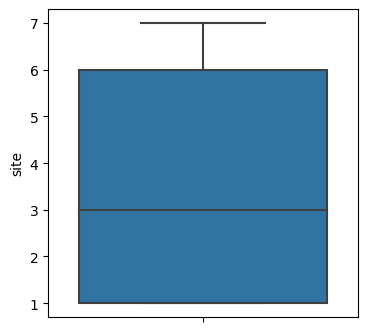

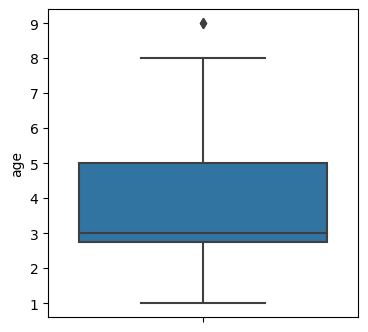

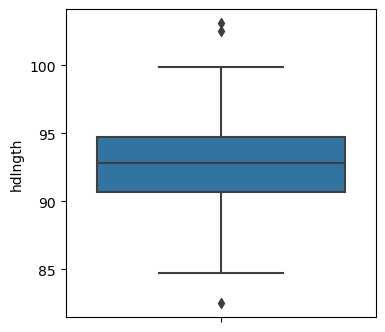

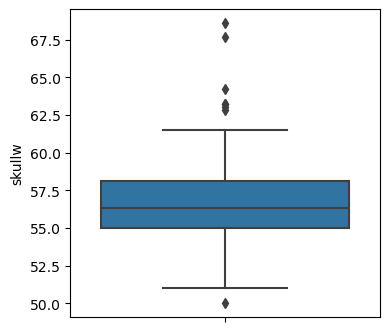

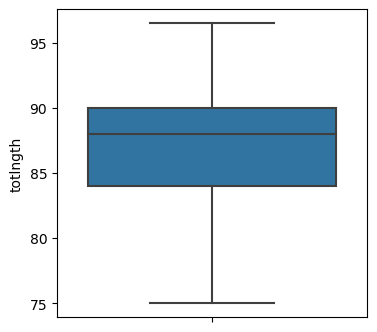

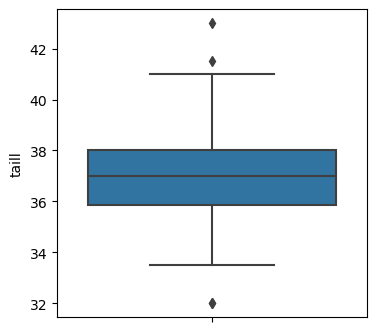

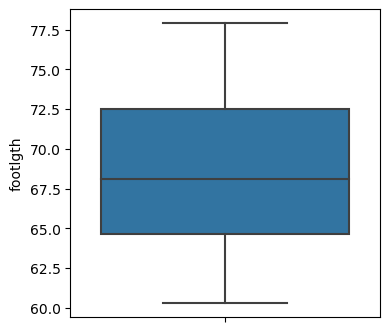

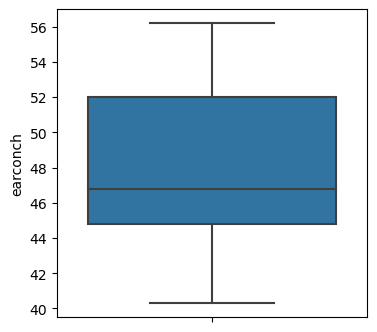

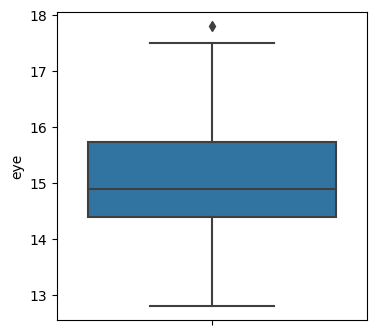

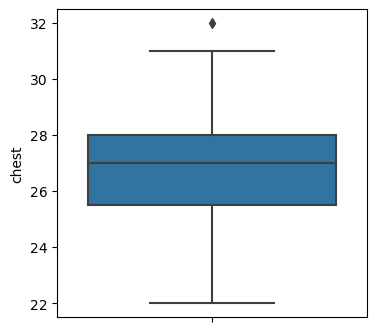

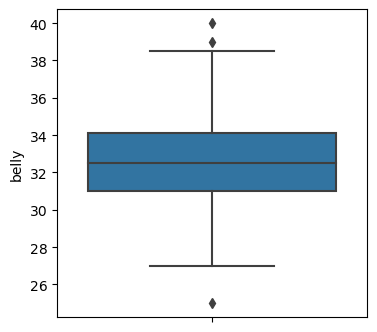

In [11]:
for i in df.columns:
    if df[i].dtypes != 'object':
        plt.figure( figsize=(4,4))
        sns.boxplot(y =df [i])
        plt.show()

In [12]:
df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

#### Label Encoding categorical columns

In [13]:
le = LabelEncoder()

In [14]:
df['Pop'] = le.fit_transform(df.Pop)

In [15]:
df['sex'] = le.fit_transform(df.sex)

In [16]:
df.head(5)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,0,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,0,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,0,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,0,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [17]:
matrix = df.corr()

In [18]:
matrix

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,1.000000,0.970353,0.860281,0.253980,-0.194404,-0.209177,-0.125065,-0.334329,0.315351,-0.781811,-0.773727,-0.084078,-0.402303,-0.211671
site,0.970353,1.000000,0.892326,0.232817,-0.130799,-0.163646,-0.083548,-0.260843,0.380444,-0.781171,-0.790716,-0.036987,-0.345494,-0.175266
Pop,0.860281,0.892326,1.000000,0.195811,-0.085747,0.001267,0.065908,-0.078666,0.490856,-0.788286,-0.883293,0.148594,-0.194957,-0.024788
sex,0.253980,0.232817,0.195811,1.000000,-0.063995,0.107200,0.080014,-0.160200,-0.040917,-0.122964,-0.091559,0.188371,-0.139074,-0.090777
age,-0.194404,-0.130799,-0.085747,-0.063995,1.000000,0.311848,0.279955,0.250970,0.117274,0.125314,0.052943,0.234669,0.325303,0.345825
hdlngth,-0.209177,-0.163646,0.001267,0.107200,0.311848,1.000000,0.710827,0.691094,0.287429,0.388941,0.121463,0.347175,0.631498,0.562663
skullw,-0.125065,-0.083548,0.065908,0.080014,0.279955,0.710827,1.000000,0.526413,0.255921,0.275057,-0.000537,0.321991,0.629737,0.451838
totlngth,-0.334329,-0.260843,-0.078666,-0.160200,0.250970,0.691094,0.526413,1.000000,0.565646,0.442866,0.154484,0.247786,0.577890,0.519465
taill,0.315351,0.380444,0.490856,-0.040917,0.117274,0.287429,0.255921,0.565646,1.000000,-0.126235,-0.385136,0.198134,0.174997,0.294493
footlgth,-0.781811,-0.781171,-0.788286,-0.122964,0.125314,0.388941,0.275057,0.442866,-0.126235,1.000000,0.768986,0.005197,0.450590,0.301736


In [19]:
df['Zscore'] = stats.zscore(df.totlngth)
df.head(5)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Zscore
0,1,1,0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0.445603
1,2,1,0,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,1.028384
2,3,1,0,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,1.960834
3,4,1,0,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,1.144941
4,5,1,0,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,-0.370290


In [20]:
df = df[df['Zscore']<3]
df.head(2)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Zscore
0,1,1,0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0.445603
1,2,1,0,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,1.028384


In [21]:
df.drop(columns=['Zscore'],inplace= True)
df.shape

(104, 14)

#### Checking the correlation with target column 

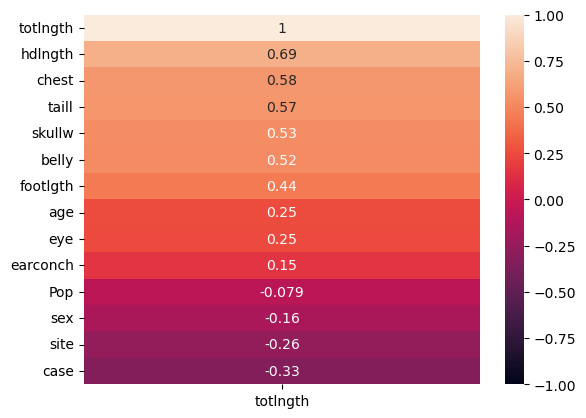

In [22]:
sns.heatmap( df.corr()[['totlngth']].sort_values(by = 'totlngth', ascending= False),\
            vmax=1,vmin=-1,annot= True)
plt.show()

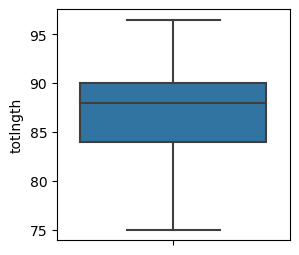

In [23]:
plt.figure(figsize=(3,3))
sns.boxplot(data= df, y = df.totlngth)
plt.show()

In [24]:
df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [25]:
x = df[['chest','hdlngth','taill','skullw','belly']].values

##### target column

In [26]:
y =df[['totlngth']].values

#### Feature Scaling

In [27]:
rs = RobustScaler()

In [28]:
x = rs.fit_transform(x)

#### Model Building`

In [29]:
models = {
    'LinearRegression':LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor(random_state=0),
    'Ridge':Ridge(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'LinearSVR':LinearSVR()
}

In [30]:
for name, model in models.items():
    scores = cross_val_score(model,x,y,scoring= "neg_mean_squared_error",cv =10, n_jobs = -1)
    print('Cross Validation score is:{}'.format(name))
    rmse  = np.sqrt(-scores)
    rmse_avg = np.mean(rmse)
    print('Average RMSE is:', rmse_avg)
    print('*'*80)
    

Cross Validation score is:LinearRegression
Average RMSE is: 2.7652663741301224
********************************************************************************
Cross Validation score is:RandomForestRegressor
Average RMSE is: 3.0655315533805223
********************************************************************************
Cross Validation score is:Ridge
Average RMSE is: 2.757967826891367
********************************************************************************
Cross Validation score is:GradientBoostingRegressor
Average RMSE is: 3.089535615896721
********************************************************************************
Cross Validation score is:AdaBoostRegressor
Average RMSE is: 2.87089098389164
********************************************************************************
Cross Validation score is:DecisionTreeRegressor
Average RMSE is: 4.293771308540171
********************************************************************************
Cross Validation score is:LinearSVR


##### Ridge is the best model

In [31]:
ridge =Ridge()

In [48]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size= 0.2, \
                                                shuffle=True, random_state= 30)

In [49]:
ridge.fit(x_train,y_train)

Ridge()

In [50]:
ridge.score(x_train,y_train)

0.5958659219318236

In [51]:
ridge.score(x_test,y_test)

0.7681965413670127

In [52]:
y_pred = ridge.predict(x_test)

In [53]:
output =pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Prediction'], dtype=float)

In [54]:
output

,Actual,Prediction
0,91.5,87.060398
1,89.0,87.198698
2,91.0,91.355180
3,81.0,82.412213
4,90.0,89.592670
5,91.5,89.096936
6,91.5,87.865602
7,94.0,89.930531
8,80.5,83.138566
9,85.0,87.717308


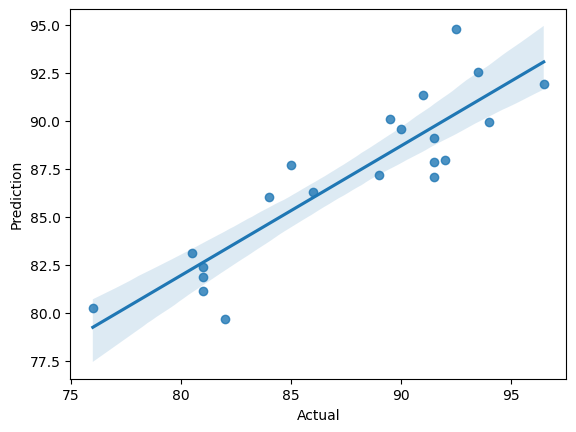

In [57]:
sns.regplot( data = output, x ='Actual',y= 'Prediction')
plt.show()